<a href="https://colab.research.google.com/github/SankarshanaaSagaram/solid-octo-winner/blob/main/mrm_task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing all the dependencies/modules

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from math import exp

# Data collection and processing

1. **test** **data**

In [54]:
#loading the data from csv file to pandas
titanic_test = pd.read_csv('/content/test.csv')
titanic_survival_data = pd.read_csv('/content/sample_submission.csv')

In [55]:
titanic_test_data = pd.merge(titanic_test, titanic_survival_data )

In [56]:
#printing the first 5 rows of the datset
titanic_test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [57]:
#number of rows and columns
titanic_test_data.shape

(418, 12)

In [58]:
# getting more info
titanic_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 42.5+ KB


In [59]:
#checking missing values
titanic_test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [60]:
# as the majority of the data from the cabin column is null, dropping column 'Cabin'
titanic_test_data = titanic_test_data.drop(columns='Cabin', axis=1)

In [61]:
# as there are less number of values missing from 'Age' column, we can't drop it
# hence,replacing all the null values with the mean age
titanic_test_data['Age'].fillna(titanic_test_data['Age'].mean(), inplace=True)
titanic_test_data['Fare'].fillna(titanic_test_data['Fare'].mean(), inplace=True)

Encoding the categorical test values

In [62]:
titanic_test_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [63]:
titanic_test_data['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [64]:
#converting categorical columns
titanic_test_data.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [65]:
titanic_test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0,1


Seperating features and Target

In [66]:
X_test = titanic_test_data.drop(columns= ['PassengerId','Name','Survived','Ticket','Embarked'], axis=1).values
Y_test = titanic_test_data['Survived'].values

2. **train data**

In [67]:
#loading the data from csv file to pandas
titanic_train_data = pd.read_csv('/content/train.csv')

In [68]:
#printing the first 5 rows of the datset
titanic_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
#number of rows and columns
titanic_train_data.shape

(891, 12)

In [70]:
# getting more info
titanic_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [71]:
#checking missing values
titanic_train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [72]:
# as the majority of the data from the cabin column is null, dropping column 'Cabin'
titanic_train_data = titanic_train_data.drop(columns='Cabin', axis=1)

In [73]:
# as there are less number of values missing from 'Age' column, we can't drop it
# hence,replacing all the null values with the mean age
titanic_train_data['Age'].fillna(titanic_train_data['Age'].mean(), inplace=True)

In [74]:
# we can repeat the same thing for 'Embarked' column with  the help of mode
titanic_train_data['Embarked'].fillna(titanic_train_data['Embarked'].mode(), inplace=True)

Encoding the categorical test values

In [75]:
titanic_train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [76]:
titanic_train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [77]:
titanic_train_data.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [78]:
titanic_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0.0


Seperating features and Target

In [79]:
X_train = titanic_train_data.drop(columns= ['PassengerId','Name','Survived','Ticket','Embarked'], axis=1).values
Y_train = titanic_train_data['Survived'].values

# Model Training

**Logistic** **Regression**

In [80]:
print(X_train)

[[ 3.          0.         22.          1.          0.          7.25      ]
 [ 1.          1.         38.          1.          0.         71.2833    ]
 [ 3.          1.         26.          0.          0.          7.925     ]
 ...
 [ 3.          1.         29.69911765  1.          2.         23.45      ]
 [ 1.          0.         26.          0.          0.         30.        ]
 [ 3.          0.         32.          0.          0.          7.75      ]]


In [81]:
model = LogisticRegression()

In [82]:
# training the Logistic Regression model with training data
model.fit(X_train, Y_train)

LogisticRegression()

Accuracy

In [83]:
X_train_prediction = model.predict(X_train)

In [84]:
print(X_train_prediction)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0
 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1
 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1
 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1
 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1
 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0
 0 0 0 1 0 1 0 0 0 0 0 0 

In [85]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ',training_data_accuracy)           

Accuracy score of training data :  0.797979797979798


In [86]:
#test data
X_test_prediction = model.predict(X_test)

In [87]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of testing data : ',test_data_accuracy) 

Accuracy score of testing data :  0.9449760765550239


In [88]:
X_test_prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [89]:
#confusion matrix for visualization
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, X_test_prediction)
cnf_matrix

array([[253,  13],
       [ 10, 142]])

Text(0.5, 257.44, 'Predicted result')

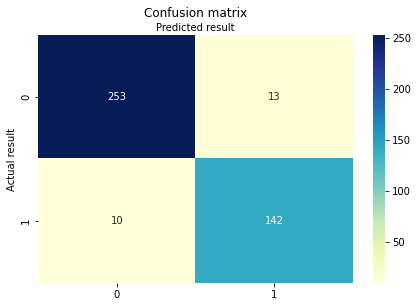

In [101]:
#name of classes
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual result')
plt.xlabel('Predicted result')

In [102]:
print("Accuracy:",metrics.accuracy_score(Y_test, X_test_prediction))
print("Precision:",metrics.precision_score(Y_test, X_test_prediction))
print("Recall:",metrics.recall_score(Y_test, X_test_prediction))

Accuracy: 0.9449760765550239
Precision: 0.9161290322580645
Recall: 0.9342105263157895
